In [22]:
import pandas as pd
df = pd.read_csv('titanic_prepared_data.csv')
df.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,FamilySize
0,0,1,22.0,7.2500,0,0,1,0,0,1,2
1,1,0,38.0,71.2833,1,0,0,1,0,0,2
2,1,0,26.0,7.9250,0,0,1,0,0,1,1
3,1,0,35.0,53.1000,1,0,0,0,0,1,2
4,0,1,35.0,8.0500,0,0,1,0,0,1,1


In [23]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0:1].values
print X.shape, y.shape
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print X_train.shape, y_train.shape

(891L, 10L) (891L, 1L)
(623L, 10L) (623L, 1L)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logclf = LogisticRegression()
logclf.fit(X_train, y_train.ravel()) 
logpredicted = logclf.predict(X_test)
logaccuracy = round( accuracy_score(logpredicted, y_test) * 100, 2)
print (str(logaccuracy) + 'percent')

80.22percent


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knnclf = KNeighborsClassifier(n_neighbors = 3)
knnclf.fit(X_train, y_train.ravel())
knnpredicted = knnclf.predict(X_test)
knnaccuracy = round(accuracy_score(knnpredicted, y_test) * 100, 2)
print (str(knnaccuracy) + 'percent')

68.28percent


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train.ravel())
dtpredicted = dtclf.predict(X_test)
dtaccuracy = round(accuracy_score(dtpredicted, y_test) * 100, 2)
print (str(dtaccuracy) + ' percent')

75.75 percent


In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
nbclf = GaussianNB()
nbclf.fit(X_train, y_train.ravel())
nbpredicted= nbclf.predict(X_test)
nbaccuracy = round(accuracy_score(nbpredicted, y_test) * 100, 2)
print (str(nbaccuracy) + 'percent')

78.36percent


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train.ravel())
rfpredicted = rf_clf.predict(X_test)
rf_accuracy = round(accuracy_score(rfpredicted, y_test) * 100, 2)
print (str(rf_accuracy) + 'percent')

80.97percent


In [29]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 
              'Random Forest', 'Naive Bayes'],
    
    'Score': [logaccuracy,knnaccuracy,dtaccuracy, 
              rf_accuracy, nbaccuracy]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,80.97
0,Logistic Regression,80.22
4,Naive Bayes,78.36
2,Decision Tree,75.75
1,KNN,68.28


<function matplotlib.pyplot.show>

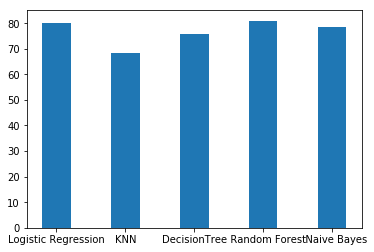

In [60]:
import numpy as np
import matplotlib.pyplot as plt
Model_name=['Logistic Regression', 'KNN', 'DecisionTree','   Random Forest', '   Naive Bayes']
Model_accuracy=[logaccuracy,knnaccuracy,dtaccuracy, rf_accuracy, nbaccuracy]
Model_pos=np.arange(len(Model_name))
Model_pos=Model_pos*12
plt.bar(Model_pos,Model_accuracy,align='center',width=5)
plt.xticks(Model_pos,Model_name)
plt.show